In [2]:
import pandas as pd
df = pd.read_csv('fruit.csv')
df

,Colour,Texture,Weight,Diameter,Fruit
0,red,1.00,120,5.0,apple
1,orange,0.80,98,4.0,clementine
2,green,0.85,235,8.2,apple
3,orange,0.90,105,5.2,clementine
4,orange,0.60,125,6.4,clementine
5,green,0.15,165,9.1,apple
6,red,0.00,187,11.1,apple
7,orange,1.00,103,5.7,clementine
8,red,0.40,196,9.6,apple
9,orange,0.35,112,4.4,clementine


In [3]:
#Identify unique values for colours and fruit
print("Colours : \t", df.Colour.unique())
print("Fruit : \t", df.Fruit.unique())


Colours : 	 ['red' 'orange' 'green']
Fruit : 	 ['apple' 'clementine']


<AxesSubplot:xlabel='Weight', ylabel='Texture'>

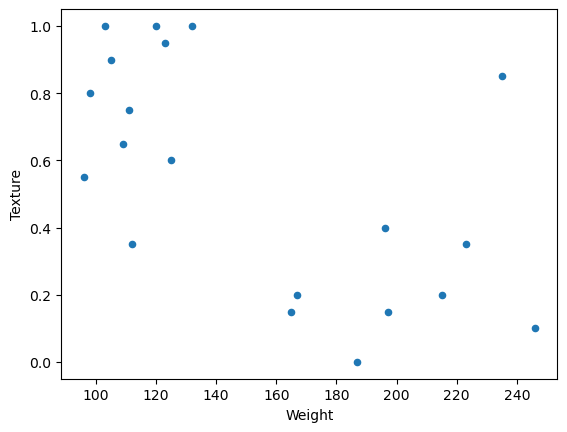

In [4]:
#Scatter plot
df.plot(x='Weight', y='Texture', kind='scatter')

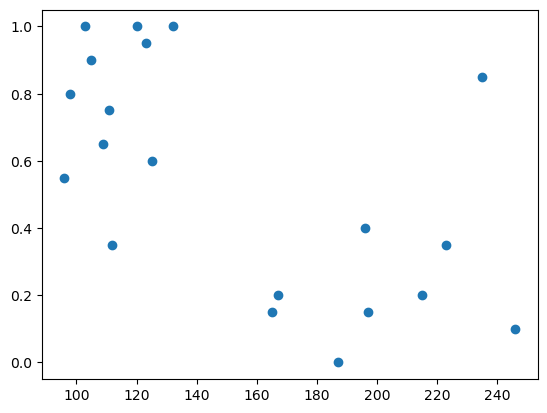

In [5]:
#Matplotlib Scatter plot
import matplotlib.pyplot as plt
x=df.Weight
y=df.Texture
plt.scatter(x, y)
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Texture'>

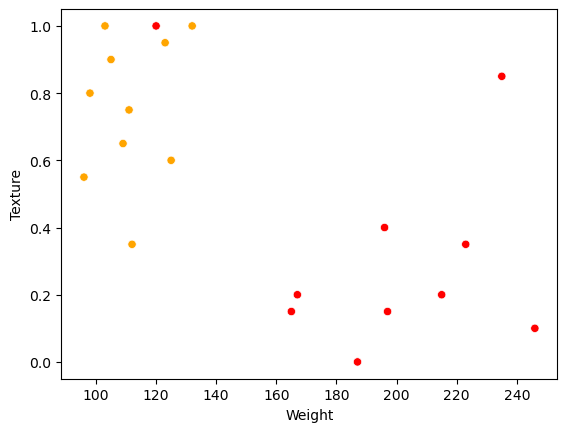

In [6]:
#Create a seaborn scatter plot for samples from each class - Weight and Texture
import seaborn as sns
sns.scatterplot(x="Weight", y="Texture", hue='Fruit', markers=["c", "a"], palette=['red', 'orange'], data=df, legend=False)

<AxesSubplot:xlabel='Weight', ylabel='Diameter'>

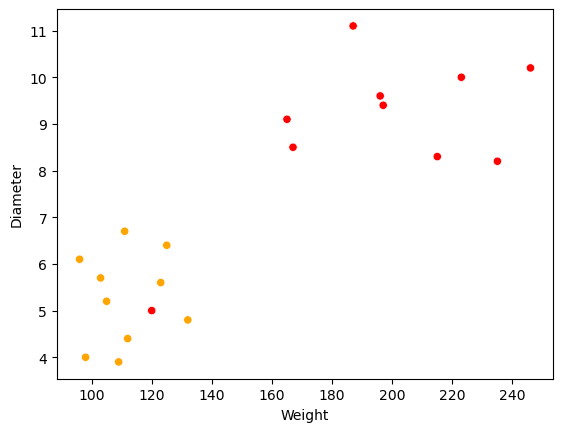

In [7]:
#Create a seaborn scatter plot for samples from each class - Weight and Diameter
import seaborn as sns
sns.scatterplot(x="Weight", y="Diameter", hue='Fruit', markers=["c", "a"], palette=['red', 'orange'], data=df, legend=False)

In [8]:
#Convert string to numbers to use for classification
df['Colour'].replace(['red', 'orange', 'green'], [0, 1, 2], inplace=True)
df['Fruit'].replace(['apple', 'clementine'], [0, 1], inplace=True)
print(df)

    Colour  Texture  Weight  Diameter  Fruit
0        0     1.00     120       5.0      0
1        1     0.80      98       4.0      1
2        2     0.85     235       8.2      0
3        1     0.90     105       5.2      1
4        1     0.60     125       6.4      1
5        2     0.15     165       9.1      0
6        0     0.00     187      11.1      0
7        1     1.00     103       5.7      1
8        0     0.40     196       9.6      0
9        1     0.35     112       4.4      1
10       1     0.55      96       6.1      1
11       0     0.20     215       8.3      0
12       0     0.35     223      10.0      0
13       2     0.10     246      10.2      0
14       1     0.75     111       6.7      1
15       0     0.20     167       8.5      0
16       2     0.15     197       9.4      0
17       1     0.95     123       5.6      1
18       1     1.00     132       4.8      1
19       1     0.65     109       3.9      1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree

#Prepare data and split into test/train data
feature_cols = ['Colour', 'Texture', 'Weight', 'Diameter']
X = df[feature_cols]
y = df.Fruit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


#Create an instance of the Decision Tress Classifier and fit the data.
clffruit = tree.DecisionTreeClassifier()
clffruit.fit(X_train, y_train)

DecisionTreeClassifier()

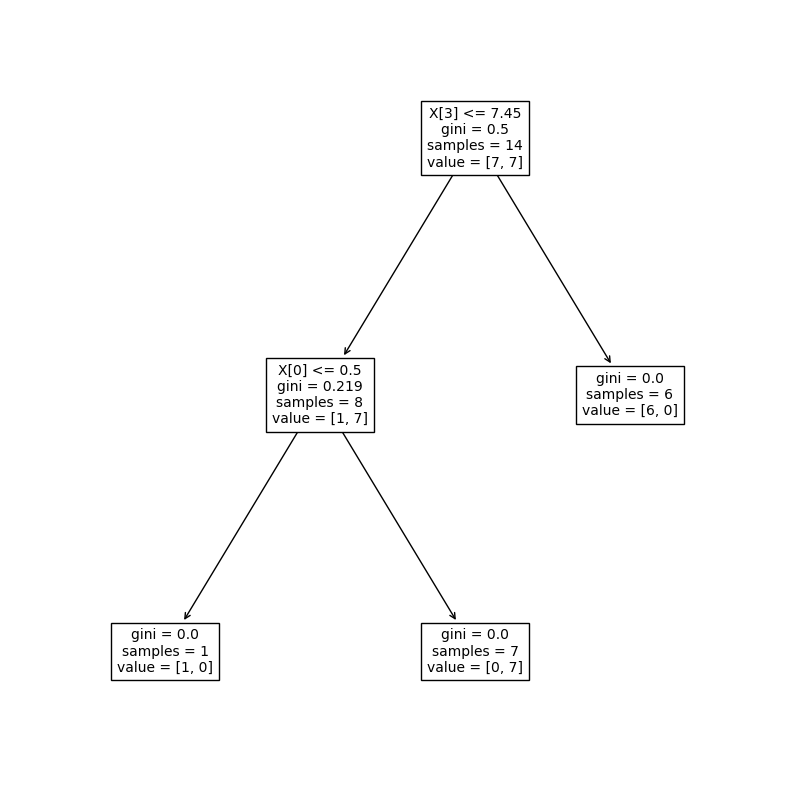

In [10]:
#Plot the decision tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clffruit, fontsize=10)
plt.show()

In [11]:
#Predicting fruit using test data
predicted = clffruit.predict(X_test)
print(X_test)
print(y_test)
print(predicted)

    Colour  Texture  Weight  Diameter
1        1     0.80      98       4.0
13       2     0.10     246      10.2
19       1     0.65     109       3.9
4        1     0.60     125       6.4
5        2     0.15     165       9.1
15       0     0.20     167       8.5
1     1
13    0
19    1
4     1
5     0
15    0
Name: Fruit, dtype: int64
[1 0 1 1 0 0]


In [12]:
#Displaying the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predicted)
print(accuracy*100)

100.0
